In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
#read mbta dataset
mbta = pd.read_excel(r'C:\Users\omar mohamed\Downloads\task\mbta.xlsx')
mbta.head()

,MBTA Avg Weekday Unlinked Passenger Trips (thousands),Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 50,Unnamed: 51,Unnamed: 52,Unnamed: 53,Unnamed: 54,Unnamed: 55,Unnamed: 56,Unnamed: 57,Unnamed: 58,Unnamed: 59
0,NaN,mode,2007-01,2007-02,2007-03,2007-04,2007-05,2007-06,2007-07,2007-08,...,2011-01,2011-02,2011-03,2011-04,2011-05,2011-06,2011-07,2011-08,2011-09,2011-10
1,1.0,All Modes by Qtr,NaN,NaN,1187.65,NaN,NaN,1245.96,NaN,NaN,...,NaN,NaN,1223.45,NaN,NaN,1302.41,NaN,NaN,1290.55,NaN
2,2.0,Boat,4,3.6,40,4.3,4.9,5.8,6.521,6.572,...,3.14,3.284,3.674,4.251,4.431,5.474,6.581,6.733,5.003,4.484
3,3.0,Bus,335.819,338.675,339.867,352.162,354.367,350.543,357.519,355.479,...,334.958,346.234,380.399,380.446,385.289,376.317,361.585,353.793,388.271,398.456
4,4.0,Commuter Rail,142.2,138.5,137.7,139.5,139,143,142.391,142.364,...,128.396,125.463,134.374,134.169,136.14,135.581,132.41,130.616,136.901,128.72


In [3]:
mbta.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12 entries, 0 to 11
Data columns (total 60 columns):
MBTA Avg Weekday Unlinked Passenger Trips (thousands)    11 non-null float64
Unnamed: 1                                               12 non-null object
Unnamed: 2                                               11 non-null object
Unnamed: 3                                               11 non-null object
Unnamed: 4                                               12 non-null object
Unnamed: 5                                               11 non-null object
Unnamed: 6                                               11 non-null object
Unnamed: 7                                               12 non-null object
Unnamed: 8                                               11 non-null object
Unnamed: 9                                               11 non-null object
Unnamed: 10                                              12 non-null object
Unnamed: 11                                              11 

In [4]:
#convert all date to datetime type
mbta.iloc[0,2:]=pd.to_datetime(mbta.iloc[0,2:])
mbta.head()

,MBTA Avg Weekday Unlinked Passenger Trips (thousands),Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 50,Unnamed: 51,Unnamed: 52,Unnamed: 53,Unnamed: 54,Unnamed: 55,Unnamed: 56,Unnamed: 57,Unnamed: 58,Unnamed: 59
0,NaN,mode,2007-01-01T00:00:00.000000000,2007-02-01T00:00:00.000000000,2007-03-01T00:00:00.000000000,2007-04-01T00:00:00.000000000,2007-05-01T00:00:00.000000000,2007-06-01T00:00:00.000000000,2007-07-01T00:00:00.000000000,2007-08-01T00:00:00.000000000,...,2011-01-01T00:00:00.000000000,2011-02-01T00:00:00.000000000,2011-03-01T00:00:00.000000000,2011-04-01T00:00:00.000000000,2011-05-01T00:00:00.000000000,2011-06-01T00:00:00.000000000,2011-07-01T00:00:00.000000000,2011-08-01T00:00:00.000000000,2011-09-01T00:00:00.000000000,2011-10-01T00:00:00.000000000
1,1.0,All Modes by Qtr,NaN,NaN,1187.65,NaN,NaN,1245.96,NaN,NaN,...,NaN,NaN,1223.45,NaN,NaN,1302.41,NaN,NaN,1290.55,NaN
2,2.0,Boat,4,3.6,40,4.3,4.9,5.8,6.521,6.572,...,3.14,3.284,3.674,4.251,4.431,5.474,6.581,6.733,5.003,4.484
3,3.0,Bus,335.819,338.675,339.867,352.162,354.367,350.543,357.519,355.479,...,334.958,346.234,380.399,380.446,385.289,376.317,361.585,353.793,388.271,398.456
4,4.0,Commuter Rail,142.2,138.5,137.7,139.5,139,143,142.391,142.364,...,128.396,125.463,134.374,134.169,136.14,135.581,132.41,130.616,136.901,128.72


In [5]:
#rename the mbta columns to passenger_trips
mbta.rename(columns={'MBTA Avg Weekday Unlinked Passenger Trips (thousands)':'passenger_trips'},inplace=True)

In [6]:
#fill the only nan in passenger_trips columns by zero  
mbta['passenger_trips'] = mbta['passenger_trips'].fillna(0).astype('int')
mbta.set_index('passenger_trips',inplace=True)


In [7]:
#rename the rest of columns by numbers from 0 to 58 to make it easy when dealing with them
mbta.columns=range(0,59)

In [8]:
#convert columns from 1 : 58 to rows and call it trip
mbta=mbta.melt(id_vars=0,var_name='trip')

In [9]:
mbta

,0,trip,value
0,mode,1,2007-01-01T00:00:00.000000000
1,All Modes by Qtr,1,NaN
2,Boat,1,4
3,Bus,1,335.819
4,Commuter Rail,1,142.2
5,Heavy Rail,1,435.294
6,Light Rail,1,227.231
7,Pct Chg / Yr,1,0.02
8,Private Bus,1,4.772
9,RIDE,1,4.9


In [10]:
#make the trip rows a index
mbta.set_index(keys='trip',inplace=True)

In [11]:
#convert the all element in 0 columns a to columns
mbta=mbta.pivot(columns=0,values='value')

In [12]:
mbta

,All Modes by Qtr,Boat,Bus,Commuter Rail,Heavy Rail,Light Rail,Pct Chg / Yr,Private Bus,RIDE,TOTAL,Trackless Trolley,mode
trip,,,,,,,,,,,,
1,NaN,4,335.819,142.2,435.294,227.231,0.02,4.772,4.9,1166.97,12.757,2007-01-01T00:00:00.000000000
2,NaN,3.6,338.675,138.5,448.271,240.262,-0.04,4.417,5,1191.64,12.913,2007-02-01T00:00:00.000000000
3,1187.65,40,339.867,137.7,458.583,241.444,0.114,4.574,5.5,1204.72,13.057,2007-03-01T00:00:00.000000000
4,NaN,4.3,352.162,139.5,472.201,255.557,-0.002,4.542,5.4,1247.11,13.444,2007-04-01T00:00:00.000000000
5,NaN,4.9,354.367,139,474.579,248.262,0.049,4.768,5.4,1244.76,13.479,2007-05-01T00:00:00.000000000
6,1245.96,5.8,350.543,143,477.032,246.108,0.096,4.722,5.6,1246.13,13.323,2007-06-01T00:00:00.000000000
7,NaN,6.521,357.519,142.391,471.735,243.286,-0.037,3.936,5.253,1243.95,13.311,2007-07-01T00:00:00.000000000
8,NaN,6.572,355.479,142.364,461.605,234.907,0.004,3.946,5.308,1223.32,13.142,2007-08-01T00:00:00.000000000
9,1256.57,5.469,372.598,143.051,499.566,265.748,-0.007,4.329,5.609,1310.76,14.393,2007-09-01T00:00:00.000000000


In [13]:
#drop All Modes by Qtr columns because there is too many nulls
mbta=mbta.drop(columns=['All Modes by Qtr'])
mbta.head()

,Boat,Bus,Commuter Rail,Heavy Rail,Light Rail,Pct Chg / Yr,Private Bus,RIDE,TOTAL,Trackless Trolley,mode
trip,,,,,,,,,,,
1,4,335.819,142.2,435.294,227.231,0.02,4.772,4.9,1166.97,12.757,2007-01-01T00:00:00.000000000
2,3.6,338.675,138.5,448.271,240.262,-0.04,4.417,5,1191.64,12.913,2007-02-01T00:00:00.000000000
3,40,339.867,137.7,458.583,241.444,0.114,4.574,5.5,1204.72,13.057,2007-03-01T00:00:00.000000000
4,4.3,352.162,139.5,472.201,255.557,-0.002,4.542,5.4,1247.11,13.444,2007-04-01T00:00:00.000000000
5,4.9,354.367,139,474.579,248.262,0.049,4.768,5.4,1244.76,13.479,2007-05-01T00:00:00.000000000


In [14]:
#drop total columns because it has wrong answer
mbta=mbta.drop(columns=['TOTAL'])
mbta.head()

,Boat,Bus,Commuter Rail,Heavy Rail,Light Rail,Pct Chg / Yr,Private Bus,RIDE,Trackless Trolley,mode
trip,,,,,,,,,,
1,4,335.819,142.2,435.294,227.231,0.02,4.772,4.9,12.757,2007-01-01T00:00:00.000000000
2,3.6,338.675,138.5,448.271,240.262,-0.04,4.417,5,12.913,2007-02-01T00:00:00.000000000
3,40,339.867,137.7,458.583,241.444,0.114,4.574,5.5,13.057,2007-03-01T00:00:00.000000000
4,4.3,352.162,139.5,472.201,255.557,-0.002,4.542,5.4,13.444,2007-04-01T00:00:00.000000000
5,4.9,354.367,139,474.579,248.262,0.049,4.768,5.4,13.479,2007-05-01T00:00:00.000000000


In [15]:
#make all columns in lower case
x=[]
for i in mbta.columns:
    i=i.lower()
    x.append(i)
mbta.columns=x
mbta

,boat,bus,commuter rail,heavy rail,light rail,pct chg / yr,private bus,ride,trackless trolley,mode
trip,,,,,,,,,,
1,4,335.819,142.2,435.294,227.231,0.02,4.772,4.9,12.757,2007-01-01T00:00:00.000000000
2,3.6,338.675,138.5,448.271,240.262,-0.04,4.417,5,12.913,2007-02-01T00:00:00.000000000
3,40,339.867,137.7,458.583,241.444,0.114,4.574,5.5,13.057,2007-03-01T00:00:00.000000000
4,4.3,352.162,139.5,472.201,255.557,-0.002,4.542,5.4,13.444,2007-04-01T00:00:00.000000000
5,4.9,354.367,139,474.579,248.262,0.049,4.768,5.4,13.479,2007-05-01T00:00:00.000000000
6,5.8,350.543,143,477.032,246.108,0.096,4.722,5.6,13.323,2007-06-01T00:00:00.000000000
7,6.521,357.519,142.391,471.735,243.286,-0.037,3.936,5.253,13.311,2007-07-01T00:00:00.000000000
8,6.572,355.479,142.364,461.605,234.907,0.004,3.946,5.308,13.142,2007-08-01T00:00:00.000000000
9,5.469,372.598,143.051,499.566,265.748,-0.007,4.329,5.609,14.393,2007-09-01T00:00:00.000000000


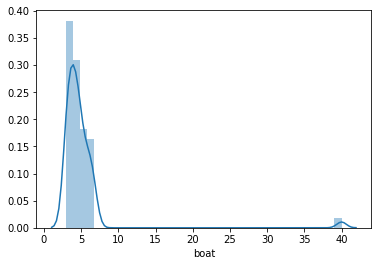

In [16]:
sns.distplot(mbta.boat)
#there are outliers above  10


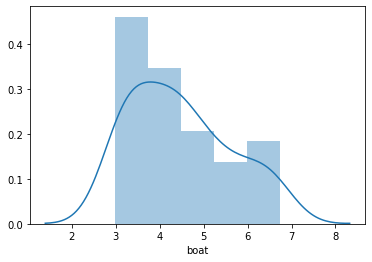

In [17]:
#remove outliers and put it equal to the mean
mbta.loc[3,'boat']=mbta['boat'].mean()
sns.distplot(mbta.boat)

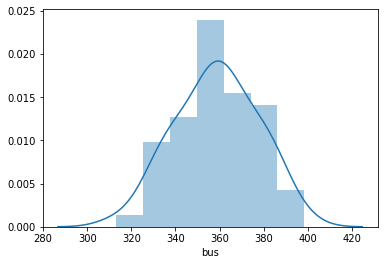

In [18]:
sns.distplot(mbta.bus)
#no outliers

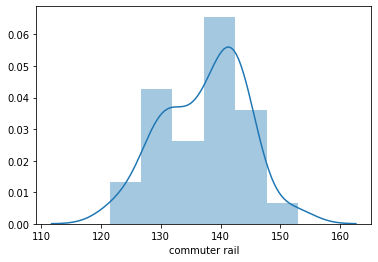

In [19]:
sns.distplot(mbta['commuter rail'])
#no outliers

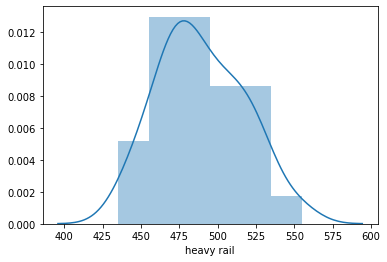

In [20]:
sns.distplot(mbta['heavy rail'])
#no outliers


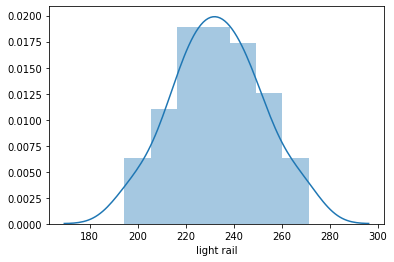

In [21]:
sns.distplot(mbta['light rail'])
#no outliers

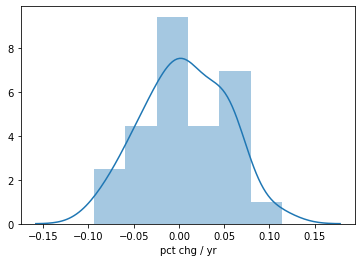

In [22]:
sns.distplot(mbta['pct chg / yr'])
#no outliers

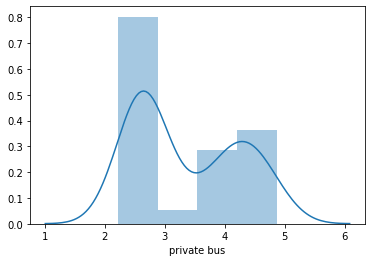

In [23]:
sns.distplot(mbta['private bus'])
#no outliers

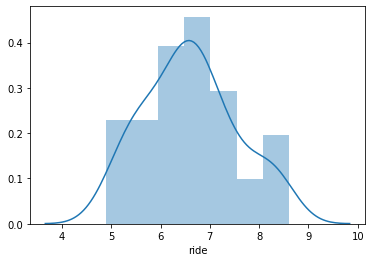

In [24]:
sns.distplot(mbta['ride'])
#no outliers

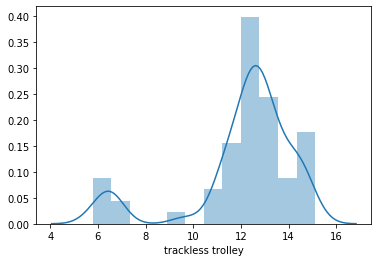

In [25]:
sns.distplot(mbta['trackless trolley'])
#we can say no outliers

In [26]:
#final shape
mbta

,boat,bus,commuter rail,heavy rail,light rail,pct chg / yr,private bus,ride,trackless trolley,mode
trip,,,,,,,,,,
1,4,335.819,142.2,435.294,227.231,0.02,4.772,4.9,12.757,2007-01-01T00:00:00.000000000
2,3.6,338.675,138.5,448.271,240.262,-0.04,4.417,5,12.913,2007-02-01T00:00:00.000000000
3,5.06797,339.867,137.7,458.583,241.444,0.114,4.574,5.5,13.057,2007-03-01T00:00:00.000000000
4,4.3,352.162,139.5,472.201,255.557,-0.002,4.542,5.4,13.444,2007-04-01T00:00:00.000000000
5,4.9,354.367,139,474.579,248.262,0.049,4.768,5.4,13.479,2007-05-01T00:00:00.000000000
6,5.8,350.543,143,477.032,246.108,0.096,4.722,5.6,13.323,2007-06-01T00:00:00.000000000
7,6.521,357.519,142.391,471.735,243.286,-0.037,3.936,5.253,13.311,2007-07-01T00:00:00.000000000
8,6.572,355.479,142.364,461.605,234.907,0.004,3.946,5.308,13.142,2007-08-01T00:00:00.000000000
9,5.469,372.598,143.051,499.566,265.748,-0.007,4.329,5.609,14.393,2007-09-01T00:00:00.000000000


In [27]:
#import null dataset
null = pd.read_csv(r'C:\Users\omar mohamed\Downloads\task\null.csv')
null.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [28]:
null.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
customerID          7043 non-null object
gender              7043 non-null object
SeniorCitizen       7043 non-null int64
Partner             7043 non-null object
Dependents          7043 non-null object
tenure              7043 non-null int64
PhoneService        7043 non-null object
MultipleLines       7043 non-null object
InternetService     7043 non-null object
OnlineSecurity      7043 non-null object
OnlineBackup        7043 non-null object
DeviceProtection    7043 non-null object
TechSupport         7043 non-null object
StreamingTV         7043 non-null object
StreamingMovies     7043 non-null object
Contract            7043 non-null object
PaperlessBilling    7043 non-null object
PaymentMethod       7043 non-null object
MonthlyCharges      7043 non-null float64
TotalCharges        7043 non-null object
Churn               7043 non-null object
dtypes: float64(1), int64(2), obj

In [29]:
#convert the data which is not unique to category type to reduce memory usage
null['gender']=null['gender'].astype('category')
null['Partner']=null['Partner'].astype('category')
null['Dependents']=null['Dependents'].astype('category')
null['PhoneService']=null['PhoneService'].astype('category')
null['InternetService']=null['InternetService'].astype('category')
null['OnlineSecurity']=null['OnlineSecurity'].astype('category')
null['OnlineBackup']=null['OnlineBackup'].astype('category')
null['DeviceProtection']=null['DeviceProtection'].astype('category')
null['TechSupport']=null['TechSupport'].astype('category')
null['StreamingTV']=null['StreamingTV'].astype('category')
null['StreamingMovies']=null['StreamingMovies'].astype('category')
null['Contract']=null['Contract'].astype('category')
null['PaperlessBilling']=null['PaperlessBilling'].astype('category')
null['PaymentMethod']=null['PaymentMethod'].astype('category')
null['Churn']=null['Churn'].astype('category')

In [30]:
#the meomory usage reduced from 1.1MB to 435KB
null.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
customerID          7043 non-null object
gender              7043 non-null category
SeniorCitizen       7043 non-null int64
Partner             7043 non-null category
Dependents          7043 non-null category
tenure              7043 non-null int64
PhoneService        7043 non-null category
MultipleLines       7043 non-null object
InternetService     7043 non-null category
OnlineSecurity      7043 non-null category
OnlineBackup        7043 non-null category
DeviceProtection    7043 non-null category
TechSupport         7043 non-null category
StreamingTV         7043 non-null category
StreamingMovies     7043 non-null category
Contract            7043 non-null category
PaperlessBilling    7043 non-null category
PaymentMethod       7043 non-null category
MonthlyCharges      7043 non-null float64
TotalCharges        7043 non-null object
Churn               7043 non-null category
dty

In [31]:
#drop duplicates 
null.drop_duplicates(inplace=True)

In [32]:
#drop nan 
null.dropna(inplace=True)
null.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7043 entries, 0 to 7042
Data columns (total 21 columns):
customerID          7043 non-null object
gender              7043 non-null category
SeniorCitizen       7043 non-null int64
Partner             7043 non-null category
Dependents          7043 non-null category
tenure              7043 non-null int64
PhoneService        7043 non-null category
MultipleLines       7043 non-null object
InternetService     7043 non-null category
OnlineSecurity      7043 non-null category
OnlineBackup        7043 non-null category
DeviceProtection    7043 non-null category
TechSupport         7043 non-null category
StreamingTV         7043 non-null category
StreamingMovies     7043 non-null category
Contract            7043 non-null category
PaperlessBilling    7043 non-null category
PaymentMethod       7043 non-null category
MonthlyCharges      7043 non-null float64
TotalCharges        7043 non-null object
Churn               7043 non-null category
dty

In [33]:
#make all columns in lower case
z=[]
for j in null.columns:
    j=j.lower()
    z.append(j)
null.columns=z


In [34]:
#final shape
null

,customerid,gender,seniorcitizen,partner,dependents,tenure,phoneservice,multiplelines,internetservice,onlinesecurity,...,deviceprotection,techsupport,streamingtv,streamingmovies,contract,paperlessbilling,paymentmethod,monthlycharges,totalcharges,churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
5,9305-CDSKC,Female,0,No,No,8,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.5,Yes
6,1452-KIOVK,Male,0,No,Yes,22,Yes,Yes,Fiber optic,No,...,No,No,Yes,No,Month-to-month,Yes,Credit card (automatic),89.10,1949.4,No
7,6713-OKOMC,Female,0,No,No,10,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,No,Mailed check,29.75,301.9,No
8,7892-POOKP,Female,0,Yes,No,28,Yes,Yes,Fiber optic,No,...,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes
9,6388-TABGU,Male,0,No,Yes,62,Yes,No,DSL,Yes,...,No,No,No,No,One year,No,Bank transfer (automatic),56.15,3487.95,No


In [35]:
#i put engine equal to python because it raise error without it (from stack overflow)
sales = pd.read_csv(r'C:\Users\omar mohamed\Downloads\task\sales.csv',engine ='python')
sales

,Unnamed: 0,event_id,primary_act_id,secondary_act_id,purch_party_lkup_id,event_name,primary_act_name,secondary_act_name,major_cat_name,minor_cat_name,...,edu_1st_indv_val,edu_2nd_indv_val,adults_in_hh_num,married_ind,child_present_ind,home_owner_ind,occpn_val,occpn_1st_val,occpn_2nd_val,dist_to_ven
0,1,abcaf1adb99a935fc661,43f0436b905bfa7c2eec,b85143bf51323b72e53c,7dfa56dd7d5956b17587,Xfinity Center Mansfield Premier Parking: Flor...,XFINITY Center Mansfield Premier Parking,NaN,MISC,PARKING,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,6c56d7f08c95f2aa453c,1a3e9aecd0617706a794,f53529c5679ea6ca5a48,4f9e6fc637eaf7b736c2,Gorge Camping - dave matthews band - sept 3-7,Gorge Camping,Dave Matthews Band,MISC,CAMPING,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,59.0
2,3,c7ab4524a121f9d687d2,4b677c3f5bec71eec8d1,b85143bf51323b72e53c,6c2545703bd527a7144d,Dodge Theatre Adams Street Parking - benise,Parking Event,NaN,MISC,PARKING,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4,394cb493f893be9b9ed1,b1ccea01ad6ef8522796,b85143bf51323b72e53c,527d6b1eaffc69ddd882,Gexa Energy Pavilion Vip Parking : kid rock wi...,Gexa Energy Pavilion VIP Parking,NaN,MISC,PARKING,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5,55b5f67e618557929f48,91c03a34b562436efa3c,b85143bf51323b72e53c,8bd62c394a35213bdf52,Premier Parking - motley crue,White River Amphitheatre Premier Parking,NaN,MISC,PARKING,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,6,4f10fd8b9f550352bd56,ac4b847b3fde66f2117e,63814f3d63317f1b56c4,3b3a628f83135acd0676,Fast Lane Access: Journey,Fast Lane Access,Journey,MISC,SPECIAL ENTRY (UPSELL),...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,7,105ea9ee10065b54b0df,a14232befff04be1e2f3,b85143bf51323b72e53c,14af02b72584fa823f85,Phil Lesh & friends-pnc bank arts center holmd...,PNC Bank Arts Center Holmdel Premier Parking,NaN,MISC,PARKING,...,High School,NaN,4.0,0.0,1.0,0.0,NaN,Craftsman Blue Collar,NaN,NaN
7,8,593b910d17913d7101cb,91c03a34b562436efa3c,b85143bf51323b72e53c,c7878d51bb2d62d4705c,Star Parking Presented By Hertz: Train - whit...,White River Amphitheatre Premier Parking,NaN,MISC,PARKING,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,9,0fb4e7152e09a40ffedd,0efaba7ce3f0d7466b42,f66a1cf484a8cd868fb4,ec216826c73d9a3f6f9c,Brad Paisley: Hertz Premier Parking,Hertz Premier Parking,Brad Paisley,MISC,PARKING,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,10,93fce8094d89e0a94aac,f6425a3223e73ea6de5a,d8c54467eb14c7dd1476,97a3efbab1bfcc0a6093,Shlohmo,Shlohmo,Purple,CONCERTS,DANCE MUSIC/DANCE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [36]:
sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 46 columns):
Unnamed: 0                5000 non-null int64
event_id                  5000 non-null object
primary_act_id            5000 non-null object
secondary_act_id          5000 non-null object
purch_party_lkup_id       5000 non-null object
event_name                5000 non-null object
primary_act_name          5000 non-null object
secondary_act_name        1586 non-null object
major_cat_name            5000 non-null object
minor_cat_name            5000 non-null object
la_event_type_cat         5000 non-null object
event_disp_name           5000 non-null object
ticket_text               5000 non-null object
tickets_purchased_qty     5000 non-null int64
trans_face_val_amt        5000 non-null float64
delivery_type_cd          5000 non-null object
event_date_time           5000 non-null object
event_dt                  5000 non-null object
presale_dt                2108 non-null object
o

In [37]:
sales.set_index('Unnamed: 0',inplace=True)
sales

,event_id,primary_act_id,secondary_act_id,purch_party_lkup_id,event_name,primary_act_name,secondary_act_name,major_cat_name,minor_cat_name,la_event_type_cat,...,edu_1st_indv_val,edu_2nd_indv_val,adults_in_hh_num,married_ind,child_present_ind,home_owner_ind,occpn_val,occpn_1st_val,occpn_2nd_val,dist_to_ven
Unnamed: 0,,,,,,,,,,,,,,,,,,,,,
1,abcaf1adb99a935fc661,43f0436b905bfa7c2eec,b85143bf51323b72e53c,7dfa56dd7d5956b17587,Xfinity Center Mansfield Premier Parking: Flor...,XFINITY Center Mansfield Premier Parking,NaN,MISC,PARKING,PARKING,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,6c56d7f08c95f2aa453c,1a3e9aecd0617706a794,f53529c5679ea6ca5a48,4f9e6fc637eaf7b736c2,Gorge Camping - dave matthews band - sept 3-7,Gorge Camping,Dave Matthews Band,MISC,CAMPING,INVALID,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,59.0
3,c7ab4524a121f9d687d2,4b677c3f5bec71eec8d1,b85143bf51323b72e53c,6c2545703bd527a7144d,Dodge Theatre Adams Street Parking - benise,Parking Event,NaN,MISC,PARKING,PARKING,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,394cb493f893be9b9ed1,b1ccea01ad6ef8522796,b85143bf51323b72e53c,527d6b1eaffc69ddd882,Gexa Energy Pavilion Vip Parking : kid rock wi...,Gexa Energy Pavilion VIP Parking,NaN,MISC,PARKING,PARKING,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,55b5f67e618557929f48,91c03a34b562436efa3c,b85143bf51323b72e53c,8bd62c394a35213bdf52,Premier Parking - motley crue,White River Amphitheatre Premier Parking,NaN,MISC,PARKING,PARKING,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,4f10fd8b9f550352bd56,ac4b847b3fde66f2117e,63814f3d63317f1b56c4,3b3a628f83135acd0676,Fast Lane Access: Journey,Fast Lane Access,Journey,MISC,SPECIAL ENTRY (UPSELL),UPSELL,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,105ea9ee10065b54b0df,a14232befff04be1e2f3,b85143bf51323b72e53c,14af02b72584fa823f85,Phil Lesh & friends-pnc bank arts center holmd...,PNC Bank Arts Center Holmdel Premier Parking,NaN,MISC,PARKING,PARKING,...,High School,NaN,4.0,0.0,1.0,0.0,NaN,Craftsman Blue Collar,NaN,NaN
8,593b910d17913d7101cb,91c03a34b562436efa3c,b85143bf51323b72e53c,c7878d51bb2d62d4705c,Star Parking Presented By Hertz: Train - whit...,White River Amphitheatre Premier Parking,NaN,MISC,PARKING,PARKING,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,0fb4e7152e09a40ffedd,0efaba7ce3f0d7466b42,f66a1cf484a8cd868fb4,ec216826c73d9a3f6f9c,Brad Paisley: Hertz Premier Parking,Hertz Premier Parking,Brad Paisley,MISC,PARKING,PARKING,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [38]:
#drop this columns because it have to much null
sales.drop(columns=['gndr_cd','age_yr',                    
'income_amt'                
,'edu_val'                   
,'edu_1st_indv_val'          
,'edu_2nd_indv_val'          
,'adults_in_hh_num'          
,'married_ind'               
,'child_present_ind'         
,'home_owner_ind'            
,'occpn_val'                 
,'occpn_1st_val'             
,'occpn_2nd_val'             
,'dist_to_ven'],inplace=True)

In [39]:
sales.dropna(inplace=True)

In [40]:
sales.reset_index(drop = True,inplace=True)

In [41]:
sales

,event_id,primary_act_id,secondary_act_id,purch_party_lkup_id,event_name,primary_act_name,secondary_act_name,major_cat_name,minor_cat_name,la_event_type_cat,...,print_dt,timezn_nm,venue_city,venue_state,venue_postal_cd_sgmt_1,sales_platform_cd,print_flg,la_valid_tkt_event_flg,fin_mkt_nm,web_session_cookie_val
0,6adcf8b2dc8a761b22b7,094156ef72361776c8ee,b148517112c348d23c90,aacf83f268bd967f98e7,Blake Shelton: Presented By Gildan,Blake Shelton,Chris Janson,CONCERTS,COUNTRY,CONCERTS,...,2015-12-09,EST,AUBURN HILLS,MICHIGAN,48326,www.ticketmaster.com,T,Y,Michigan,aacf83f268bd967f98e7
1,dcc303578fdb9493de39,a75e1e1b72ac7f7ab1f6,486fe5fcfdb664516ec1,42c5142562a4a9a01798,Godsmack,Godsmack,Within Reason,CONCERTS,ALTERNATIVE ROCK,CONCERTS,...,2015-04-16,CST,DALLAS,TEXAS,75215,www.concerts.livenation.com,T,Y,Dallas,42c5142562a4a9a01798
2,b516196d16d9f600ed69,8475a7f6159d0149c11d,a010d0552856269b65a2,e6c30f65b31f7d1c43d2,Florence And The Machine: How Beautiful Tour,Florence and the Machine,Of Monsters and Men,CONCERTS,ROCK/POP,CONCERTS,...,2016-01-16,EST,MANSFIELD,MASSACHUSETTS,02048,www.concerts.livenation.com,T,Y,Boston,e6c30f65b31f7d1c43d2
3,eef88a5dde63fc149a74,63d824ad0b2f6c12ee47,c02c74c8d0c05637215c,c85658e7afef85c3deab,Atlas Genius,Atlas Genius,Skylar Grey,CONCERTS,ALTERNATIVE ROCK,CONCERTS,...,2016-02-22,EST,DETROIT,MICHIGAN,48226,android.ticketmaster.us,T,Y,Michigan,c85658e7afef85c3deab
4,e2f4175781f0fb12320d,b63a64e824260590cf07,cae4b1421548b007bec8,f94f617de3d2faa1dea8,Insane Clown Posse - hallowicked,Insane Clown Posse,P.O.D.,CONCERTS,RAP/URBAN,CONCERTS,...,2015-09-16,EST,DETROIT,MICHIGAN,48201,mobile.livenation.us,T,Y,Michigan,f94f617de3d2faa1dea8
5,36c0cef181ce17499c26,23fa4d7e248551248770,6fd7a617426c342a117e,f3fa178866e1972a607c,Fall Out Boy - wintour is coming,Fall Out Boy,AWOLNATION,CONCERTS,ALTERNATIVE ROCK,CONCERTS,...,2016-01-04,CST,CHICAGO,ILLINOIS,60612,www.ticketmaster.com,T,Y,Chicago,f3fa178866e1972a607c
6,60301292eea2816de121,0af71548579d986b7664,744f54b2f6306c3e1a75,292c53f16a7a567d0fc7,Maroon 5,Maroon 5,Tove Lo,CONCERTS,ROCK/POP,CONCERTS,...,2016-01-30,EST,ORLANDO,FLORIDA,32801,www.ticketmaster.com,T,Y,Orlando,292c53f16a7a567d0fc7
7,7bedf37a65e931677963,47cb7b1f9c8f7817f855,913eea53bc1f9952bf69,f0bedea6d7e2a6beb10d,Rihanna: Anti World Tour 2016,Rihanna,Travis Scott,CONCERTS,ROCK/POP,CONCERTS,...,2015-12-01,EST,NEWARK,NEW JERSEY,07102,www.ticketmaster.com,T,Y,New York,f0bedea6d7e2a6beb10d
8,746197d1645c1d080f19,5af10f75fea92b5668ea,254385995da60eece597,5ae2ad8cb220f9d77467,Sweet And Tender Hooligans,Sweet and Tender Hooligans,El Conjunto Nueva Ola,CONCERTS,ROCK/POP,CONCERTS,...,2015-10-25,PST,ANAHEIM,CALIFORNIA,92802,mobile.livenation.us,T,Y,Los Angeles,5ae2ad8cb220f9d77467
9,8f3b771abcc1900cc0a0,e7977ac6f61f6a9500ab,4013c3ce8ccf6ad32375,bf9445c0d569b49f4614,Sunshine Music Festival,Tedeschi Trucks Band,Indigo Girls,CONCERTS,ROCK/POP,CONCERTS,...,2015-10-11,EST,BOCA RATON,FLORIDA,33432,mobile.ticketmaster.us,T,Y,Miami,bf9445c0d569b49f4614


In [42]:
#convert print_dt to datetime 
sales.print_dt=pd.to_datetime(sales.print_dt)
sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 866 entries, 0 to 865
Data columns (total 31 columns):
event_id                  866 non-null object
primary_act_id            866 non-null object
secondary_act_id          866 non-null object
purch_party_lkup_id       866 non-null object
event_name                866 non-null object
primary_act_name          866 non-null object
secondary_act_name        866 non-null object
major_cat_name            866 non-null object
minor_cat_name            866 non-null object
la_event_type_cat         866 non-null object
event_disp_name           866 non-null object
ticket_text               866 non-null object
tickets_purchased_qty     866 non-null int64
trans_face_val_amt        866 non-null float64
delivery_type_cd          866 non-null object
event_date_time           866 non-null object
event_dt                  866 non-null object
presale_dt                866 non-null object
onsale_dt                 866 non-null object
sales_ord_create_dttm

In [43]:
#final shape
sales

,event_id,primary_act_id,secondary_act_id,purch_party_lkup_id,event_name,primary_act_name,secondary_act_name,major_cat_name,minor_cat_name,la_event_type_cat,...,print_dt,timezn_nm,venue_city,venue_state,venue_postal_cd_sgmt_1,sales_platform_cd,print_flg,la_valid_tkt_event_flg,fin_mkt_nm,web_session_cookie_val
0,6adcf8b2dc8a761b22b7,094156ef72361776c8ee,b148517112c348d23c90,aacf83f268bd967f98e7,Blake Shelton: Presented By Gildan,Blake Shelton,Chris Janson,CONCERTS,COUNTRY,CONCERTS,...,2015-12-09,EST,AUBURN HILLS,MICHIGAN,48326,www.ticketmaster.com,T,Y,Michigan,aacf83f268bd967f98e7
1,dcc303578fdb9493de39,a75e1e1b72ac7f7ab1f6,486fe5fcfdb664516ec1,42c5142562a4a9a01798,Godsmack,Godsmack,Within Reason,CONCERTS,ALTERNATIVE ROCK,CONCERTS,...,2015-04-16,CST,DALLAS,TEXAS,75215,www.concerts.livenation.com,T,Y,Dallas,42c5142562a4a9a01798
2,b516196d16d9f600ed69,8475a7f6159d0149c11d,a010d0552856269b65a2,e6c30f65b31f7d1c43d2,Florence And The Machine: How Beautiful Tour,Florence and the Machine,Of Monsters and Men,CONCERTS,ROCK/POP,CONCERTS,...,2016-01-16,EST,MANSFIELD,MASSACHUSETTS,02048,www.concerts.livenation.com,T,Y,Boston,e6c30f65b31f7d1c43d2
3,eef88a5dde63fc149a74,63d824ad0b2f6c12ee47,c02c74c8d0c05637215c,c85658e7afef85c3deab,Atlas Genius,Atlas Genius,Skylar Grey,CONCERTS,ALTERNATIVE ROCK,CONCERTS,...,2016-02-22,EST,DETROIT,MICHIGAN,48226,android.ticketmaster.us,T,Y,Michigan,c85658e7afef85c3deab
4,e2f4175781f0fb12320d,b63a64e824260590cf07,cae4b1421548b007bec8,f94f617de3d2faa1dea8,Insane Clown Posse - hallowicked,Insane Clown Posse,P.O.D.,CONCERTS,RAP/URBAN,CONCERTS,...,2015-09-16,EST,DETROIT,MICHIGAN,48201,mobile.livenation.us,T,Y,Michigan,f94f617de3d2faa1dea8
5,36c0cef181ce17499c26,23fa4d7e248551248770,6fd7a617426c342a117e,f3fa178866e1972a607c,Fall Out Boy - wintour is coming,Fall Out Boy,AWOLNATION,CONCERTS,ALTERNATIVE ROCK,CONCERTS,...,2016-01-04,CST,CHICAGO,ILLINOIS,60612,www.ticketmaster.com,T,Y,Chicago,f3fa178866e1972a607c
6,60301292eea2816de121,0af71548579d986b7664,744f54b2f6306c3e1a75,292c53f16a7a567d0fc7,Maroon 5,Maroon 5,Tove Lo,CONCERTS,ROCK/POP,CONCERTS,...,2016-01-30,EST,ORLANDO,FLORIDA,32801,www.ticketmaster.com,T,Y,Orlando,292c53f16a7a567d0fc7
7,7bedf37a65e931677963,47cb7b1f9c8f7817f855,913eea53bc1f9952bf69,f0bedea6d7e2a6beb10d,Rihanna: Anti World Tour 2016,Rihanna,Travis Scott,CONCERTS,ROCK/POP,CONCERTS,...,2015-12-01,EST,NEWARK,NEW JERSEY,07102,www.ticketmaster.com,T,Y,New York,f0bedea6d7e2a6beb10d
8,746197d1645c1d080f19,5af10f75fea92b5668ea,254385995da60eece597,5ae2ad8cb220f9d77467,Sweet And Tender Hooligans,Sweet and Tender Hooligans,El Conjunto Nueva Ola,CONCERTS,ROCK/POP,CONCERTS,...,2015-10-25,PST,ANAHEIM,CALIFORNIA,92802,mobile.livenation.us,T,Y,Los Angeles,5ae2ad8cb220f9d77467
9,8f3b771abcc1900cc0a0,e7977ac6f61f6a9500ab,4013c3ce8ccf6ad32375,bf9445c0d569b49f4614,Sunshine Music Festival,Tedeschi Trucks Band,Indigo Girls,CONCERTS,ROCK/POP,CONCERTS,...,2015-10-11,EST,BOCA RATON,FLORIDA,33432,mobile.ticketmaster.us,T,Y,Miami,bf9445c0d569b49f4614


In [44]:
attend = pd.read_excel(r"C:\Users\omar mohamed\Downloads\task\attendance.xls")
attend

,"Table 43. Average daily attendance (ADA) as a percentage of total enrollment, school day length, and school year length in public schools, by school level and state: 2007-08",Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16
0,NaN,"Total elementary, secondary, and combined elem...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,Elementary schools,NaN,NaN,NaN,Secondary schools,NaN,NaN,NaN
1,NaN,ADA as percent of enrollment,NaN,Average hours in school day,NaN,Average days in school year,NaN,Average hours in school year,NaN,ADA as percent of enrollment,NaN,Average hours in school day,NaN,ADA as percent of enrollment,NaN,Average hours in school day,NaN
2,1,2,NaN,3,NaN,4,NaN,5,NaN,6,NaN,7,NaN,8,NaN,9,NaN
3,United States ........,93.079,0.218555,6.6447,0.017650,180,0.142993,1192.65,3.0859,94.005,0.269369,6.65606,0.015998,91.1181,0.432223,6.59439,0.040308
4,Alabama .................,93.8124,1.237261,7.02852,0.065621,180,0.755110,1266.62,12.3343,93.7764,1.839154,7.03847,0.075944,94.561,0.37928,7.13724,0.17312
5,Alaska ..................,89.9176,1.215976,6.47688,0.049882,180,3.427735,1162.91,22.8639,91.2815,1.563482,6.48679,0.053082,93.2409,1.57371,6.24087,0.145993
6,Arizona .................,89.037,2.952601,6.43369,0.091917,181,1.678664,1159.11,14.4327,88.9044,3.905033,6.44315,0.102053,88.9797,3.22058,6.36909,0.248824
7,Arkansas ................,91.8271,1.352924,6.88542,0.061468,179,0.201577,1228.89,10.6821,92.0932,2.091651,6.93216,0.076546,90.812,2.23155,6.76751,0.095928
8,California ..............,93.241,0.711649,6.24064,0.066364,181,0.439441,1128.77,12.5276,94.9314,0.753808,6.28974,0.051471,89.3609,1.44673,6.14262,0.202711
9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [45]:
attend.dropna(how='all',inplace=True)

In [46]:
attend=attend.rename( columns={attend.columns[0]:'usa_city'})
attend.head()

,usa_city,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16
0,NaN,"Total elementary, secondary, and combined elem...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,Elementary schools,NaN,NaN,NaN,Secondary schools,NaN,NaN,NaN
1,NaN,ADA as percent of enrollment,NaN,Average hours in school day,NaN,Average days in school year,NaN,Average hours in school year,NaN,ADA as percent of enrollment,NaN,Average hours in school day,NaN,ADA as percent of enrollment,NaN,Average hours in school day,NaN
2,1,2,NaN,3,NaN,4,NaN,5,NaN,6,NaN,7,NaN,8,NaN,9,NaN
3,United States ........,93.079,0.218555,6.6447,0.017650,180,0.142993,1192.65,3.0859,94.005,0.269369,6.65606,0.015998,91.1181,0.432223,6.59439,0.040308
4,Alabama .................,93.8124,1.237261,7.02852,0.065621,180,0.755110,1266.62,12.3343,93.7764,1.839154,7.03847,0.075944,94.561,0.37928,7.13724,0.17312


In [47]:
attend.usa_city=attend.usa_city.str.replace('.','').str.strip().str.lower()
attend.head()

,usa_city,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16
0,NaN,"Total elementary, secondary, and combined elem...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,Elementary schools,NaN,NaN,NaN,Secondary schools,NaN,NaN,NaN
1,NaN,ADA as percent of enrollment,NaN,Average hours in school day,NaN,Average days in school year,NaN,Average hours in school year,NaN,ADA as percent of enrollment,NaN,Average hours in school day,NaN,ADA as percent of enrollment,NaN,Average hours in school day,NaN
2,NaN,2,NaN,3,NaN,4,NaN,5,NaN,6,NaN,7,NaN,8,NaN,9,NaN
3,united states,93.079,0.218555,6.6447,0.017650,180,0.142993,1192.65,3.0859,94.005,0.269369,6.65606,0.015998,91.1181,0.432223,6.59439,0.040308
4,alabama,93.8124,1.237261,7.02852,0.065621,180,0.755110,1266.62,12.3343,93.7764,1.839154,7.03847,0.075944,94.561,0.37928,7.13724,0.17312


In [48]:
attend=attend.loc[0:63]

In [49]:
attend.reset_index(drop=True,inplace=True)
attend

,usa_city,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16
0,NaN,"Total elementary, secondary, and combined elem...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,Elementary schools,NaN,NaN,NaN,Secondary schools,NaN,NaN,NaN
1,NaN,ADA as percent of enrollment,NaN,Average hours in school day,NaN,Average days in school year,NaN,Average hours in school year,NaN,ADA as percent of enrollment,NaN,Average hours in school day,NaN,ADA as percent of enrollment,NaN,Average hours in school day,NaN
2,NaN,2,NaN,3,NaN,4,NaN,5,NaN,6,NaN,7,NaN,8,NaN,9,NaN
3,united states,93.079,0.218555,6.6447,0.017650,180,0.142993,1192.65,3.0859,94.005,0.269369,6.65606,0.015998,91.1181,0.432223,6.59439,0.040308
4,alabama,93.8124,1.237261,7.02852,0.065621,180,0.755110,1266.62,12.3343,93.7764,1.839154,7.03847,0.075944,94.561,0.37928,7.13724,0.17312
5,alaska,89.9176,1.215976,6.47688,0.049882,180,3.427735,1162.91,22.8639,91.2815,1.563482,6.48679,0.053082,93.2409,1.57371,6.24087,0.145993
6,arizona,89.037,2.952601,6.43369,0.091917,181,1.678664,1159.11,14.4327,88.9044,3.905033,6.44315,0.102053,88.9797,3.22058,6.36909,0.248824
7,arkansas,91.8271,1.352924,6.88542,0.061468,179,0.201577,1228.89,10.6821,92.0932,2.091651,6.93216,0.076546,90.812,2.23155,6.76751,0.095928
8,california,93.241,0.711649,6.24064,0.066364,181,0.439441,1128.77,12.5276,94.9314,0.753808,6.28974,0.051471,89.3609,1.44673,6.14262,0.202711
9,colorado,93.8872,0.440366,7.00761,0.051954,171,1.047398,1199.3,9.9247,94.5353,0.447224,6.96058,0.066373,91.2429,1.28132,7.00875,0.105105


In [50]:
m=[]
for k in attend.columns:
    k=k.replace('Unnamed: ','n')
    m.append(k)
attend.columns=m

In [51]:
attend.head()


,usa_city,n1,n2,n3,n4,n5,n6,n7,n8,n9,n10,n11,n12,n13,n14,n15,n16
0,NaN,"Total elementary, secondary, and combined elem...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,Elementary schools,NaN,NaN,NaN,Secondary schools,NaN,NaN,NaN
1,NaN,ADA as percent of enrollment,NaN,Average hours in school day,NaN,Average days in school year,NaN,Average hours in school year,NaN,ADA as percent of enrollment,NaN,Average hours in school day,NaN,ADA as percent of enrollment,NaN,Average hours in school day,NaN
2,NaN,2,NaN,3,NaN,4,NaN,5,NaN,6,NaN,7,NaN,8,NaN,9,NaN
3,united states,93.079,0.218555,6.6447,0.017650,180,0.142993,1192.65,3.0859,94.005,0.269369,6.65606,0.015998,91.1181,0.432223,6.59439,0.040308
4,alabama,93.8124,1.237261,7.02852,0.065621,180,0.755110,1266.62,12.3343,93.7764,1.839154,7.03847,0.075944,94.561,0.37928,7.13724,0.17312


In [52]:
attend.dropna(inplace = True)
attend

,usa_city,n1,n2,n3,n4,n5,n6,n7,n8,n9,n10,n11,n12,n13,n14,n15,n16
3,united states,93.079,0.218555,6.6447,0.017650,180,0.142993,1192.65,3.0859,94.005,0.269369,6.65606,0.015998,91.1181,0.432223,6.59439,0.040308
4,alabama,93.8124,1.237261,7.02852,0.065621,180,0.755110,1266.62,12.3343,93.7764,1.839154,7.03847,0.075944,94.561,0.37928,7.13724,0.17312
5,alaska,89.9176,1.215976,6.47688,0.049882,180,3.427735,1162.91,22.8639,91.2815,1.563482,6.48679,0.053082,93.2409,1.57371,6.24087,0.145993
6,arizona,89.037,2.952601,6.43369,0.091917,181,1.678664,1159.11,14.4327,88.9044,3.905033,6.44315,0.102053,88.9797,3.22058,6.36909,0.248824
7,arkansas,91.8271,1.352924,6.88542,0.061468,179,0.201577,1228.89,10.6821,92.0932,2.091651,6.93216,0.076546,90.812,2.23155,6.76751,0.095928
8,california,93.241,0.711649,6.24064,0.066364,181,0.439441,1128.77,12.5276,94.9314,0.753808,6.28974,0.051471,89.3609,1.44673,6.14262,0.202711
9,colorado,93.8872,0.440366,7.00761,0.051954,171,1.047398,1199.3,9.9247,94.5353,0.447224,6.96058,0.066373,91.2429,1.28132,7.00875,0.105105
10,connecticut,87.9259,2.984395,6.46655,0.087829,181,0.137733,1173.08,15.9229,87.3722,3.977535,6.46963,0.111509,93.7472,0.68057,6.46219,0.091594
11,delaware,89.7706,1.754942,6.67801,0.089584,181,0.831973,1208.23,18.6503,89.3634,2.502472,6.76638,0.060578,‡,(†),6.54407,0.225909
12,district of columbia,91.2208,1.269699,6.91375,0.214259,181,0.437943,1255.96,42.2610,93.9313,0.378824,6.91651,0.096940,‡,(†),‡,(†)
